In [17]:
import os
print(os.listdir("/content/drive/MyDrive"))

['mnist_784.csv', 'Colab Notebooks', 'Classroom', 'Emailing quiz of introduction of computers.pdf', 'iio-zdbg-ify - Sep 14, 2023.gjam', 'iio-zdbg-ify - Sep 14, 2023.pdf', 'ilovepdf_merged (3).pdf', 'IMG_20230920_191939.jpg', 'IMG_20230920_192053.jpg', 'DOC-20230920-WA0000. (1)', 'summary 6-10.gdoc', 'Untitled document (7).gdoc', 'Untitled document (6).gdoc', 'Untitled document (5).gdoc', 'SUMMARY 11-15.gdoc', 'summary 16-19.gdoc', 'IMG-231111-085459-4987.jpg', 'DOC-20230920-WA0000.', 'THE ALCHEMIST.gdoc', 'THE ALCHEMIST 21-40.gdoc', 'Untitled document (4).gdoc', 'Untitled document (3).gdoc', 'Alchemist 41-70.gdoc', 'ALCHEMIST 71-100.gdoc', 'ALCHEMIST 101-130.gdoc', 'ALCHEMIST 131-160.gdoc', 'Untitled document (2).gdoc', 'THE  DIARY OF YOUNG GIRL 7-54.gdoc', 'THE DIARY OF ANNE FRANK 55-108.gdoc', 'quiz 1 python.pdf', 'THE DIARY OF A YOUNG GIRL 109-164.gdoc', 'DHP quiz 2.pdf', 'THE DIARY OF A YOUNG GIRL 164-226.gdoc', 'THE DIARY OF A YOUNG GIRL (226-280).gdoc', 'Manu.pdf', 'manu@professi

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
zip_path = "/content/drive/MyDrive/cell_images.zip"
extract_path = "/content/"  # Extracting inside Colab

In [20]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [21]:
import os
print(os.listdir("/content/"))

['.config', 'drive', 'cell_images', 'sample_data']


In [22]:
dataset_path = "/content/cell_images"

In [23]:
print(os.listdir(dataset_path))

['Parasitized', 'Uninfected']


In [24]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"  # Adjust based on your classification task
)

NameError: name 'datagen' is not defined

Verify Class Distribution

In [25]:
import os

parasitized_path = "/content/cell_images/Parasitized"
uninfected_path = "/content/cell_images/Uninfected"

print(f"Parasitized: {len(os.listdir(parasitized_path))} images")
print(f"Uninfected: {len(os.listdir(uninfected_path))} images")

Parasitized: 13780 images
Uninfected: 13780 images


Check Sample Images

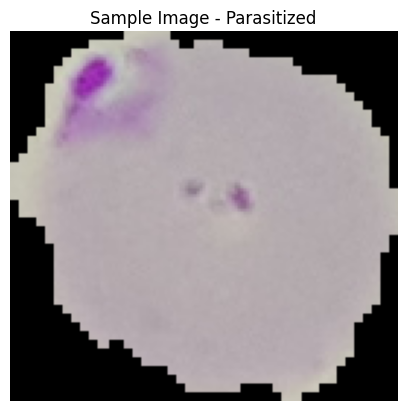

In [26]:
import matplotlib.pyplot as plt
import cv2

sample_img_path = os.path.join(parasitized_path, os.listdir(parasitized_path)[0])  # First Parasitized image
img = cv2.imread(sample_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

plt.imshow(img)
plt.axis("off")
plt.title("Sample Image - Parasitized")
plt.show()

✔ Resize images

✔ Normalize pixel values

✔ Convert images to NumPy arrays

✔ Split into training & testing sets

In [27]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Define paths
dataset_path = "/content/cell_images"
parasitized_path = os.path.join(dataset_path, "Parasitized")
uninfected_path = os.path.join(dataset_path, "Uninfected")

# Image properties
img_size = 64  # Resize all images to 64x64
data = []
labels = []

# Load images
def load_images_from_folder(folder, label):
    for filename in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(label)

# Load both classes
load_images_from_folder(parasitized_path, 0)  # Parasitized = 0
load_images_from_folder(uninfected_path, 1)   # Uninfected = 1

# Convert to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Reshape labels for ML models
y_train_ml, y_test_ml = y_train, y_test  # Keep labels for ML models
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


100%|██████████| 13780/13780 [00:13<00:00, 984.40it/s] 


Training Samples: 22046, Testing Samples: 5512


🔹 Train SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten images for ML models
X_train_ml = X_train.reshape(X_train.shape[0], -1)
X_test_ml = X_test.reshape(X_test.shape[0], -1)

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_ml, y_train_ml)

# Predict and Evaluate
svm_preds = svm_model.predict(X_test_ml)
svm_acc = accuracy_score(y_test_ml, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")


🔹 Train KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_ml, y_train_ml)

# Predict and Evaluate
knn_preds = knn_model.predict(X_test_ml)
knn_acc = accuracy_score(y_test_ml, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")


🔹 Train Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_ml, y_train_ml)

# Predict and Evaluate
dt_preds = dt_model.predict(X_test_ml)
dt_acc = accuracy_score(y_test_ml, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
